                                                 Exercise 2
                                                Zach Sherman
                                          Argonne National Laboratory

In [1]:
#Reading in a NEXRAD file and plotting a PPI.
#Import modules
import pyart
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from datetime import datetime
from pytz import timezone
from io import StringIO
print(pyart.__version__)

C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\pyart\map\grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree


1.6.0


C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipyker

In [2]:
#Testing if pyart is running correctly.
if pyart.__version__ == "1.6.0":
    if hasattr(pyart.graph, 'RadarMapDisplay'):
        print ("Ready to go")
    else:
        print ("ISSUES\n\nMissing\Broken Basemap\n")
        pyart._debug_info()
else:
    print ("ISSUES\n\nWrong Py-ART version\n")
    pyart._debug_info()

Ready to go


In [3]:
#Importing datafile
filename = 'KLOT20130417_235520_V06.gz'
radar = pyart.io.read(filename)

In [4]:
#Background information on NEXRAD and WSR-88D.
print("In 1988, the NEXRAD Agencies established the WSR-88D (Weather Surveillance Radar - 1988 Doppler) Radar Operations Center (ROC) in Norman, Oklahoma.")

In 1988, the NEXRAD Agencies established the WSR-88D (Weather Surveillance Radar - 1988 Doppler) Radar Operations Center (ROC) in Norman, Oklahoma.


In [5]:
print("The ROC provides centralized meteorological, software, maintenance, and engineering support for all WSR-88D systems.")
print("The ROC also operates WSR-88D test systems for the development of hardware and software upgrades to enhance maintenance, operation, and provide new functionality")

The ROC provides centralized meteorological, software, maintenance, and engineering support for all WSR-88D systems.
The ROC also operates WSR-88D test systems for the development of hardware and software upgrades to enhance maintenance, operation, and provide new functionality


In [6]:
#Checking radar fields
radar.fields.keys()

C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Zach Sherman\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


dict_keys(['differential_phase', 'reflectivity', 'velocity', 'spectrum_width', 'cross_correlation_ratio', 'differential_reflectivity'])

In [7]:
#Obtaining time and date when data was obtained.
radar.time

{'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([   0.988,    1.011,    1.036, ...,  251.014,  251.049,  251.08 ]),
 'long_name': 'time_in_seconds_since_volume_start',
 'standard_name': 'time',
 'units': 'seconds since 2013-04-17T23:55:20Z'}

In [8]:
#Obtaining datetime using datetime and pytz modules.
date_str = ("2013-04-17 23:55:20")
datetime_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
datetime_obj_utc = datetime_obj.replace(tzinfo = timezone('UTC'))
print (datetime_obj_utc.strftime("%Y-%m-%d %H:%M:%S %Z%z"))



2013-04-17 23:55:20 UTC+0000


In [9]:
radar = radar.extract_sweeps([0, 0])
radar

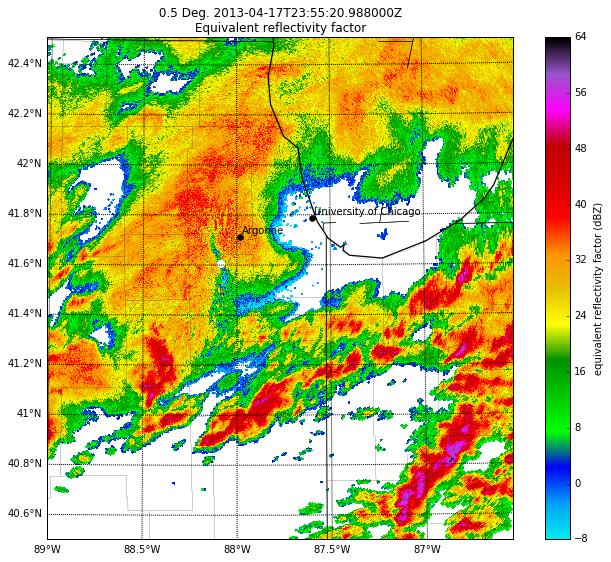

In [10]:
#Plot of reflectivity with Argonne and University of Chicago marked on the plot.
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [25,9])
plt.subplot(1, 2, 2) 
display.plot_ppi_map('reflectivity', max_lat = 42.5, min_lat =40.5, min_lon = -89, max_lon = -86.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(40,45,.2), lon_lines = np.arange(-92, -79, .5),
                     resolution = 'i')
display.basemap.drawcounties()
display.plot_point(-87.5987, 41.7886, symbol='ko', label_text="University of Chicago", label_offset=(None, None))
display.plot_point(-87.9819, 41.7137, symbol='ko', label_text="Argonne", label_offset=(None, None))

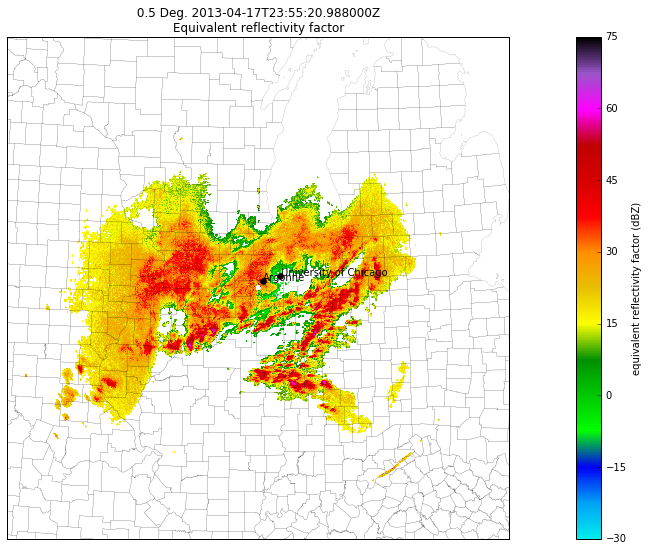

In [11]:
#Plot of reflectivity with counties and locations marked using nexrad site instead of input coordinates.
nexrad_site = 'klot'
f = plt.figure(figsize = [24,9])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-30, vmax=75, cmap='pyart_NWSRef',
    resolution='i', embelish=False)
display.basemap.drawcounties()
display.plot_point(-87.5987, 41.7886, symbol='ko', label_text="University of Chicago", label_offset=(None, None))
display.plot_point(-87.9819, 41.7137, symbol='ko', label_text="Argonne", label_offset=(None, None))